**Graph Analysis And Social Networks** (103000903)

MSc in Data Science (10BA)

School of Computer Science - Universidad Politécnica de Madrid

2021/2022 - Semester 2

# Installation and imports

If needed, install [NetworkX](https://networkx.org/):

In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Basic operations

## Creating a graph

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [2]:
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


## Adding nodes

Single nodes:

In [3]:
G.add_node('a')
print(G)

Graph with 1 nodes and 0 edges


From iterable object:

In [4]:
G.add_nodes_from(['b', 'c'])
print(G)

Graph with 3 nodes and 0 edges


In [5]:
G.nodes

NodeView(('a', 'b', 'c'))

From another graph:

In [8]:
H = nx.Graph()
H.add_node('z')
G.add_nodes_from(H)
print(G)
G.nodes

Graph with 4 nodes and 0 edges


NodeView(('a', 'b', 'c', 'z'))

**Caveat!** This is different from adding the graph H as a node of G:

In [13]:
Gprime = G.copy()
Gprime.add_node(H)
print(Gprime)
Gprime.nodes

Graph with 5 nodes and 0 edges


NodeView(('a', 'b', 'c', 'z', <networkx.classes.graph.Graph object at 0x7f9267fca6a0>))

You can delete nodes as follows:

In [14]:
print(Gprime)
Gprime.remove_node('a')
print(Gprime)

Graph with 5 nodes and 0 edges
Graph with 4 nodes and 0 edges


You can delete all information of the graph with `clear`:

In [15]:
Gprime.clear()
print(Gprime)

Graph with 0 nodes and 0 edges


You can also add node attributes using tuples of the form `(node, node_attribute_dict)`:

In [16]:
G.add_nodes_from([
    ('d', {'color': 'green'}),
    ('e', {'color': 'blue'})
])
print(G)

Graph with 6 nodes and 0 edges


See the nodes as an attribute of the graph:

In [18]:
G.nodes

NodeView(('a', 'b', 'c', 'z', 'd', 'e'))

And the number of nodes in the graph:

In [19]:
G.number_of_nodes()

6

## Connecting the nodes: edges

Similarly:

In [20]:
G.add_edge('a', 'b')
aux = ('a', 'c')
G.add_edge(*aux)
print(G)

Graph with 6 nodes and 2 edges


Multiple edges:

In [21]:
G.add_edges_from([('b', 'c'), ('c', 'd')])
print(G)

Graph with 6 nodes and 4 edges


From another graph:

In [22]:
H.add_node('y')
H.add_edge('y', 'z')
print(G.nodes)
G.add_edges_from(H.edges)
print(G)

['a', 'b', 'c', 'z', 'd', 'e']
Graph with 7 nodes and 5 edges


What happened with the nodes of H?

In [23]:
print(G.nodes)

['a', 'b', 'c', 'z', 'd', 'e', 'y']


In [24]:
'y' in G.nodes

True

You can delete edges as follows:

In [25]:
print(H)
H.remove_edge('y', 'z')
print(H)

Graph with 2 nodes and 1 edges
Graph with 2 nodes and 0 edges


You can also add edge attributes using tuples of the form `(edge, edge_attribute_dict)`:

In [26]:
G.add_edges_from([
    ('b', 'c', {'weight': 3.5}),
    ('c', 'd', {'weight': 2})
])
print(G)

Graph with 7 nodes and 5 edges


See the edges as an attribute of the graph:

In [27]:
G.edges

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd'), ('z', 'y')])

And the number of edges in the graph:

In [28]:
G.number_of_edges()

5

Accessing edges and its attributes:

In [21]:
G.edges['b', 'c']

{'weight': 3.5}

**Exercise 1:** Build a complete graph of 7 nodes. Name it differently from G and H.

In [28]:
n = 7
M = nx.Graph()
M.add_nodes_from(list(range(7)))
M.add_edges_from([(i, j) for i in range(n) for j in range(n) if i != j])
print(M)

Graph with 7 nodes and 21 edges


# Drawing graphs

## Basic drawing

The basic command for drawing a graph in NetwokX is `draw`:

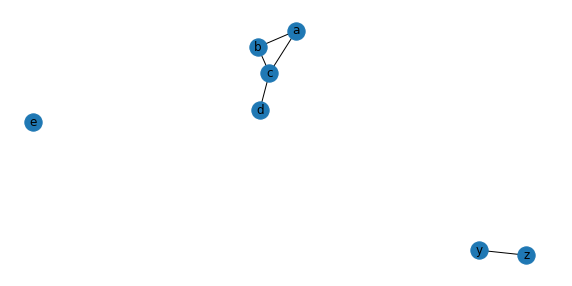

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
nx.draw(G, with_labels=True)
plt.show()

You can use different layouts:

In [30]:
nx.draw_shell?

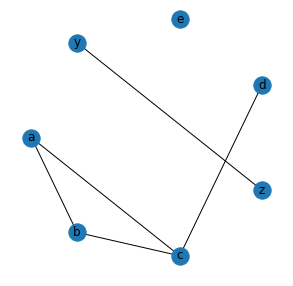

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_shell(G, with_labels=True)
plt.show()

In [32]:
nx.draw_circular?

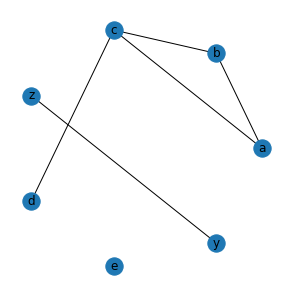

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_circular(G, with_labels=True)
plt.show()

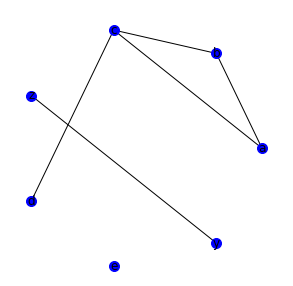

In [34]:
opts = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 1
}

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_circular(G, with_labels=True, **opts)
plt.show()

Save graph:

In [35]:
fig.savefig('data/G.png')

**Exercise 2:** Take the complete graph of 7 nodes and draw it. Choose and change:
  1. Node color.
  2. Node size.
  3. Node shape.
  4. Edge color.
  5. Edge style.
  6. Color transparency.
  7. Font color.
  8. Font weight.

Check [the docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for more information.

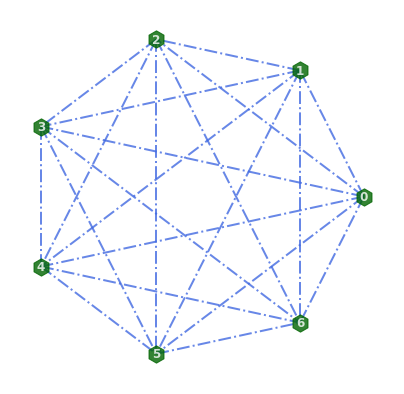

In [36]:
opts = {
    'node_color': 'darkgreen',
    'node_size': 300,
    'node_shape': 'h',
    'edge_color': 'royalblue',
    'width': 2,
    'alpha': 0.8,
    'style': '-.',
    'font_color': 'white',
    'font_weight': 'bold',
    'label': 'My graph'
}

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(M, with_labels=True, **opts)
plt.show()

## Existing graphs

Petersen graph:

![petersen](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Petersen_graph.svg/252px-Petersen_graph.svg.png)

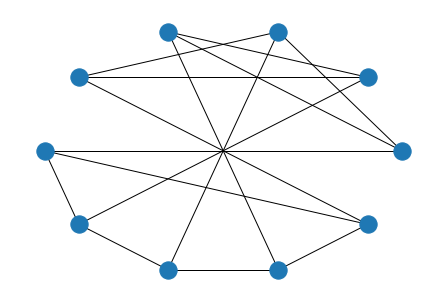

In [37]:
P = nx.petersen_graph()
nx.draw_shell(P)

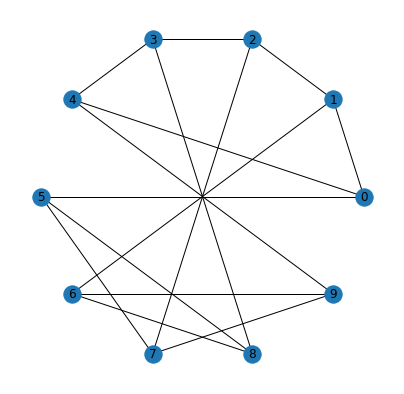

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(P, with_labels=True)
plt.show()

Use the `nlist` keyword:

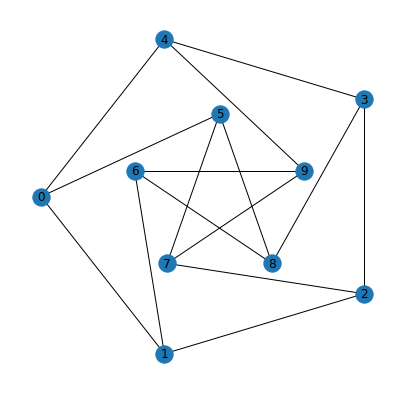

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_shell(P, with_labels=True, nlist=[range(5, 10), range(5)])
plt.show()

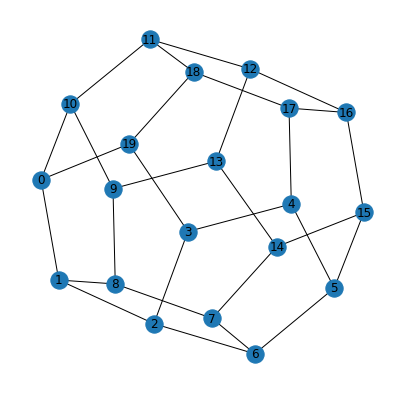

In [39]:
D = nx.dodecahedral_graph()

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)

nx.draw(D, with_labels=True)
plt.show()

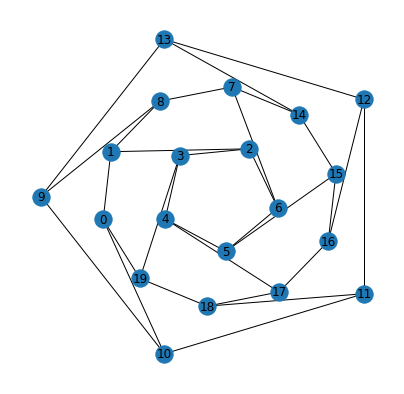

In [40]:
D = nx.dodecahedral_graph()

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(D, with_labels=True,  nlist=shells)
plt.show()

**Exercise 3:** Take the complete graph of 7 nodes and draw it in two concentric circles.

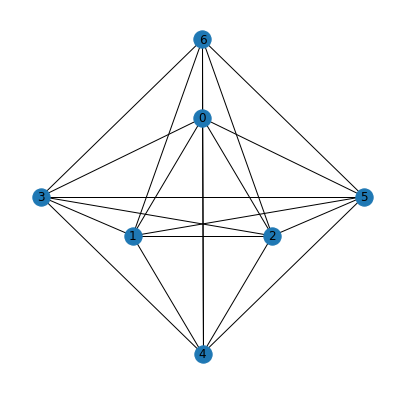

In [109]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
shells = [[0, 1, 2], [3, 4, 5, 6]]
nx.draw_shell(M, with_labels=True,  nlist=shells)
plt.show()

### And many more

Yes, you guessed it right, also complete graphs:

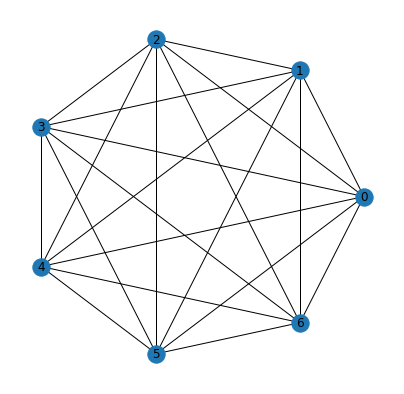

In [42]:
Mprime = nx.complete_graph(7)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(Mprime, with_labels=True)
plt.show()

One step beyond:

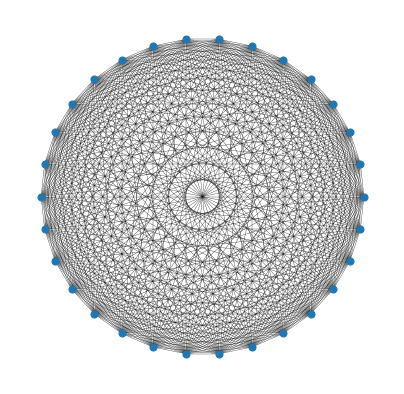

In [43]:
opts = {
    'node_size': 50,
    'width': 0.3
}

Mprime = nx.complete_graph(30)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw_circular(Mprime, with_labels=False, **opts)
plt.show()

Complete bipartite:

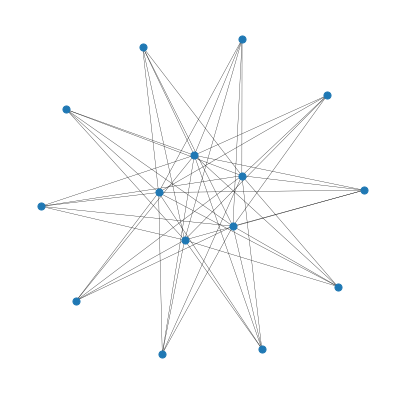

In [87]:
m, n = 5, 10
K = nx.complete_bipartite_graph(m, n)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(K, with_labels=False, **opts)
plt.show()

We can plot it in a more "classical" way as follows:

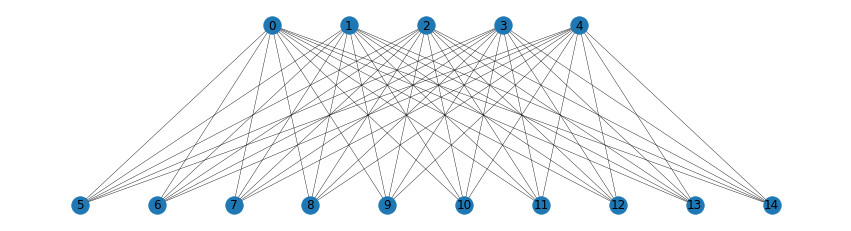

In [88]:
pos = {}
pos.update((i, (i - m/2, 1)) for i in range(m))
pos.update((i, (i - m - n/2, 0)) for i in range(m, m + n))

fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
nx.draw(K, with_labels=True, pos=pos, node_size=300, width=0.4)
plt.show()


Lollipop graph:

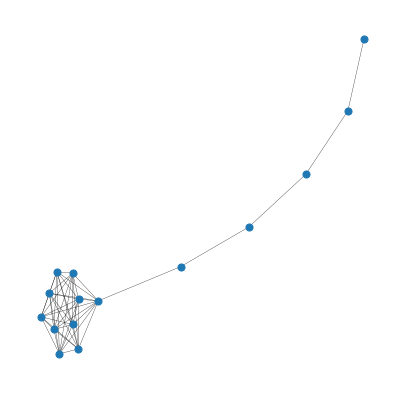

In [89]:
Mprime = nx.lollipop_graph(10, 5)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(Mprime, with_labels=False, **opts)
plt.show()

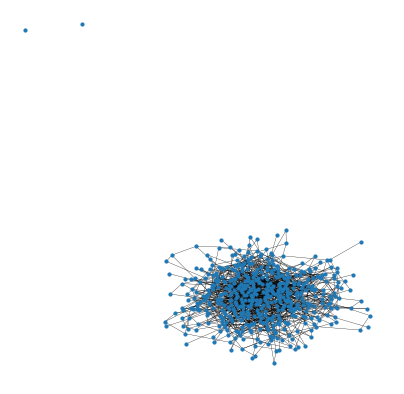

In [90]:
opts = {
    'node_size': 10,
    'width': 0.3
}

G1 = nx.erdos_renyi_graph(500, 0.01, 123, False)

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(G1, with_labels=False, **opts)
plt.show()

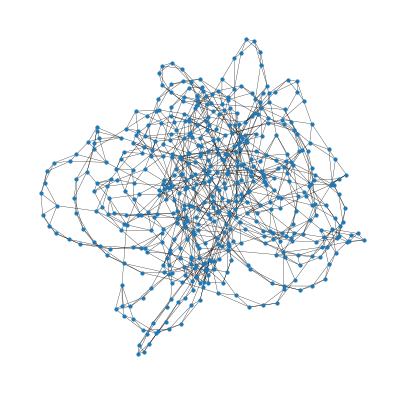

In [91]:
G2 = nx.newman_watts_strogatz_graph(500, 4, 0.1, 123) 

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(G2, with_labels=False, **opts)
plt.show()

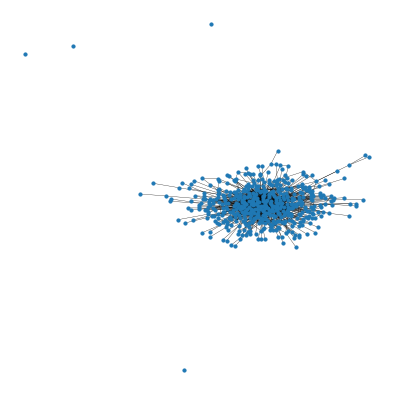

In [92]:
G3 = nx.extended_barabasi_albert_graph(500, 1, 0.5, 0.1, 123) 

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
nx.draw(G3, with_labels=False, **opts)
plt.show()

# Analyzing graphs

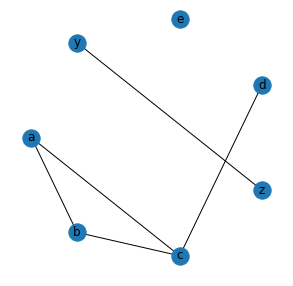

In [93]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
nx.draw_shell(G, with_labels=True)
plt.show()

Connected components:

In [94]:
list(nx.connected_components(G))

[{'a', 'b', 'c', 'd'}, {'y', 'z'}, {'e'}]

Check the degree of every node:

In [95]:
sorted((n, d) for n, d in G.degree())

[('a', 2), ('b', 2), ('c', 3), ('d', 1), ('e', 0), ('y', 1), ('z', 1)]

Find cycles:

In [96]:
nx.algorithms.find_cycle(G)

[('a', 'b'), ('b', 'c'), ('c', 'a')]

Compute all shortest paths:

In [97]:
dict(nx.all_pairs_shortest_path(G))

{'a': {'a': ['a'], 'b': ['a', 'b'], 'c': ['a', 'c'], 'd': ['a', 'c', 'd']},
 'b': {'b': ['b'], 'a': ['b', 'a'], 'c': ['b', 'c'], 'd': ['b', 'c', 'd']},
 'c': {'c': ['c'], 'a': ['c', 'a'], 'b': ['c', 'b'], 'd': ['c', 'd']},
 'z': {'z': ['z'], 'y': ['z', 'y']},
 'd': {'d': ['d'],
  'c': ['d', 'c'],
  'a': ['d', 'c', 'a'],
  'b': ['d', 'c', 'b']},
 'e': {'e': ['e']},
 'y': {'y': ['y'], 'z': ['y', 'z']}}

# Read and write a graph

Check [the docs](https://networkx.org/documentation/stable/reference/readwrite/index.html).

Export to adjacency list:

In [98]:
nx.write_adjlist(M, 'data/M.adjlist')

Read the same graph:

In [99]:
print(nx.read_adjlist('data/M.adjlist'))

Graph with 7 nodes and 21 edges


**Exercise 4:** Take the complete graph of 7 nodes, and:
  1. Export it to GEXF format.
  2. Open Gephi and load it.
  3. Modify anything of the loaded graph.
  4. Export it back to a new GEXF.
  5. Try to read that modified graph in NetworkX. What happens?

Export to gexf list:

In [100]:
nx.write_gexf(M, 'data/M.gexf')

Read the exported graph by Gephi:

In [101]:
print(nx.read_gexf('data/M_gephi.gexf'))

NetworkXError: No <graph> element in GEXF file.

This is likely to be due to the GEXF version: 1.2 vs 1.3. Open both files with a browser to verify it.

However, for GraphML format:

In [102]:
print(nx.read_graphml('data/M_gephi.graphml'))

Graph with 7 nodes and 21 edges


# Final notes about NetworkX

Even if we did not cover it, you can also build:
  - [Directed graphs](https://networkx.org/documentation/stable/reference/classes/digraph.html#networkx.DiGraph)
  - [Multigraphs](https://networkx.org/documentation/stable/reference/classes/multigraph.html#networkx.MultiGraph)
  - [MultiDiGraphs](https://networkx.org/documentation/stable/reference/classes/multidigraph.html#networkx.MultiDiGraph)
  - etc.

Furthermore, you can perform operations such as:
  - union,
  - composition,
  - cartesian product,
  - convert to undirected,
  - and many more.

Finally, there are more [algorithms](https://networkx.org/documentation/stable/reference/algorithms/index.html) that can be applied to a graph:
  - travelling salesman,
  - closeness,
  - find cliques,
  - etc.

# Moviegalaxies

1. Download the moviegalaxies dataset: https://dx.doi.org/10.7910/DVN/T4HBA3  
**Note**: If you are working in Collab, download the zip file manually, upload it to Collab, and unzip it with `!unzip file.zip`

2. Check the available movies:

In [103]:
import os
n_folder = './moviegalaxies/'
n_list = [f for f in os.listdir(n_folder) if os.path.isfile(os.path.join(n_folder, f)) and f.endswith('.gexf')]
print('{} movies loaded'.format(len(n_list)))

773 movies loaded


3. Get a list with the number of nodes per network:

In [104]:
numberOfNodes_list = []
for n in n_list:
    network = nx.read_gexf(n_folder + n)
    nodes = network.number_of_nodes()
    numberOfNodes_list.append(nodes)
print('Maximum number of characters in a movie: {}'.format(max(numberOfNodes_list)))

Maximum number of characters in a movie: 109


4. Plot a histogram of characters per movie:

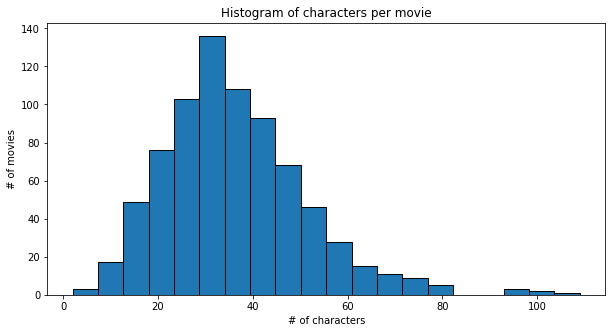

In [105]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.hist(numberOfNodes_list, bins=20, edgecolor='k')
ax.set_title('Histogram of characters per movie')
ax.set_xlabel('# of characters')
ax.set_ylabel('# of movies')
plt.show()

**Exercise 5:**
  - Pick a movie from the list (see the `network_metadata.tab` file).
  - Load it and explore their social networks using NetworkX.
  - Now do it with Gephi.
  - What can you deduce from centrality, clustering, and community detection metrics?
  - Repeat for a different movie and compare it.